In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"D:\My projects\Customer default prediction\MLprojects\Data.xlsx")

In [3]:
df.head()

,AccountID,LoanAmount,Days_Cat,Payment_status,State,CB_Score,PDD_Pending,DPD_related_Deviation,Asset_Type,EMI_date,RM_Name,Ticket_size,EMI_Amount,Is_existing,Gender,Tenor,Client_Vintage,Non_OTR_FA,Disb_week,Status
0,1001SBM0360000064,120000,20-30 Days,fully paid not on date,Tamil Nadu,615.0,No,No,Unsecured,5,Malaravan Eshwaran,1-2 Lac,4835.0,New,FEMALE,36,765,Yes,4th week,1
1,10190IL0030000003,810000,1-10 Days,fully paid not on date,Tamil Nadu,429.0,No,Yes,Secured,5,Jeyaram T,7-10 Lac,16743.0,New,MALE,120,335,Yes,4th week,1
2,1019IL00060000006,300000,1-10 Days,fully paid not on date,Tamil Nadu,16.0,No,No,Secured,5,MANARAJ M,2-3 Lac,8983.0,New,MALE,60,462,Yes,4th week,1
3,1019IL00060000018,300000,20-30 Days,fully paid not on date,Tamil Nadu,379.0,No,Yes,Secured,5,Jeyaram T,2-3 Lac,8983.0,New,FEMALE,60,365,Yes,4th week,1
4,1019IL00060000028,300000,20-30 Days,fully paid not on date,Tamil Nadu,0.0,Yes,No,Secured,5,Gobi Subash R,2-3 Lac,8806.0,New,MALE,60,309,Yes,4th week,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33993 entries, 0 to 33992
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountID              33993 non-null  object 
 1   LoanAmount             33993 non-null  int64  
 2   Days_Cat               33993 non-null  object 
 3   Payment_status         33993 non-null  object 
 4   State                  33993 non-null  object 
 5   CB_Score               29297 non-null  float64
 6   PDD_Pending            33993 non-null  object 
 7   DPD_related_Deviation  33993 non-null  object 
 8   Asset_Type             33993 non-null  object 
 9   EMI_date               33993 non-null  int64  
 10  RM_Name                33959 non-null  object 
 11  Ticket_size            33993 non-null  object 
 12  EMI_Amount             33993 non-null  float64
 13  Is_existing            33993 non-null  object 
 14  Gender                 33339 non-null  object 
 15  Te

In [5]:
df.isnull().sum()

AccountID                   0
LoanAmount                  0
Days_Cat                    0
Payment_status              0
State                       0
CB_Score                 4696
PDD_Pending                 0
DPD_related_Deviation       0
Asset_Type                  0
EMI_date                    0
RM_Name                    34
Ticket_size                 0
EMI_Amount                  0
Is_existing                 0
Gender                    654
Tenor                       0
Client_Vintage              0
Non_OTR_FA                  0
Disb_week                   0
Status                      0
dtype: int64

In [6]:
print(round(df.isnull().sum()*100/df.shape[0]),2)

AccountID                 0.0
LoanAmount                0.0
Days_Cat                  0.0
Payment_status            0.0
State                     0.0
CB_Score                 14.0
PDD_Pending               0.0
DPD_related_Deviation     0.0
Asset_Type                0.0
EMI_date                  0.0
RM_Name                   0.0
Ticket_size               0.0
EMI_Amount                0.0
Is_existing               0.0
Gender                    2.0
Tenor                     0.0
Client_Vintage            0.0
Non_OTR_FA                0.0
Disb_week                 0.0
Status                    0.0
dtype: float64 2


In [7]:
df['CB_Score'].fillna(df['CB_Score'].mean(),inplace=True)
df['Gender'].fillna(df['Gender'].value_counts().idxmax(),inplace=True)
df['RM_Name'].fillna(df['RM_Name'].value_counts().idxmax(),inplace=True)

In [8]:
df.isnull().sum()

AccountID                0
LoanAmount               0
Days_Cat                 0
Payment_status           0
State                    0
CB_Score                 0
PDD_Pending              0
DPD_related_Deviation    0
Asset_Type               0
EMI_date                 0
RM_Name                  0
Ticket_size              0
EMI_Amount               0
Is_existing              0
Gender                   0
Tenor                    0
Client_Vintage           0
Non_OTR_FA               0
Disb_week                0
Status                   0
dtype: int64

In [9]:
val=df.columns.tolist()
for i in val:
    print(df[i].value_counts())
    print("-"*50)

10560IL0020000015    2
1919SBM0240000005    2
2403SBM0360000027    2
20490IL0010000036    2
2031SBM0480000065    2
                    ..
1854SBM0360000106    1
1854SBM0360000103    1
1854SBM0360000102    1
1854SBM0360000101    1
SAMA210108000194     1
Name: AccountID, Length: 33581, dtype: int64
--------------------------------------------------
300000     5875
200000     5399
150000     3981
100000     2365
500000     1915
           ... 
218000        1
241000        1
409000        1
2250000       1
754000        1
Name: LoanAmount, Length: 370, dtype: int64
--------------------------------------------------
0 Days        28890
20-30 Days     2324
10-20 Days     1458
1-10 Days      1321
Name: Days_Cat, dtype: int64
--------------------------------------------------
Fully paid on date        28890
fully paid not on date     5103
Name: Payment_status, dtype: int64
--------------------------------------------------
Rajasthan         8864
Karnataka         8482
Madhya Pradesh    7519
T

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanAmount,33993.0,280777.318418,204046.424886,50000.0,150000.0,210000.0,300000.0,2500000.0
CB_Score,33993.0,477.676861,278.896302,0.0,346.0,596.0,691.0,884.0
EMI_date,33993.0,5.224752,1.091820,1.0,5.0,5.0,5.0,20.0
EMI_Amount,33993.0,9096.670793,4108.570661,2185.0,6205.0,8273.0,10674.0,57711.0
Tenor,33993.0,47.696084,22.054414,12.0,36.0,36.0,60.0,120.0
Client_Vintage,33993.0,370.679022,291.114449,20.0,138.0,278.0,518.0,1673.0
Status,33993.0,0.202365,0.401769,0.0,0.0,0.0,0.0,1.0


In [11]:
obj_col=df.select_dtypes(include='object').columns
obj_col

Index(['AccountID', 'Days_Cat', 'Payment_status', 'State', 'PDD_Pending',
       'DPD_related_Deviation', 'Asset_Type', 'RM_Name', 'Ticket_size',
       'Is_existing', 'Gender', 'Non_OTR_FA', 'Disb_week'],
      dtype='object')

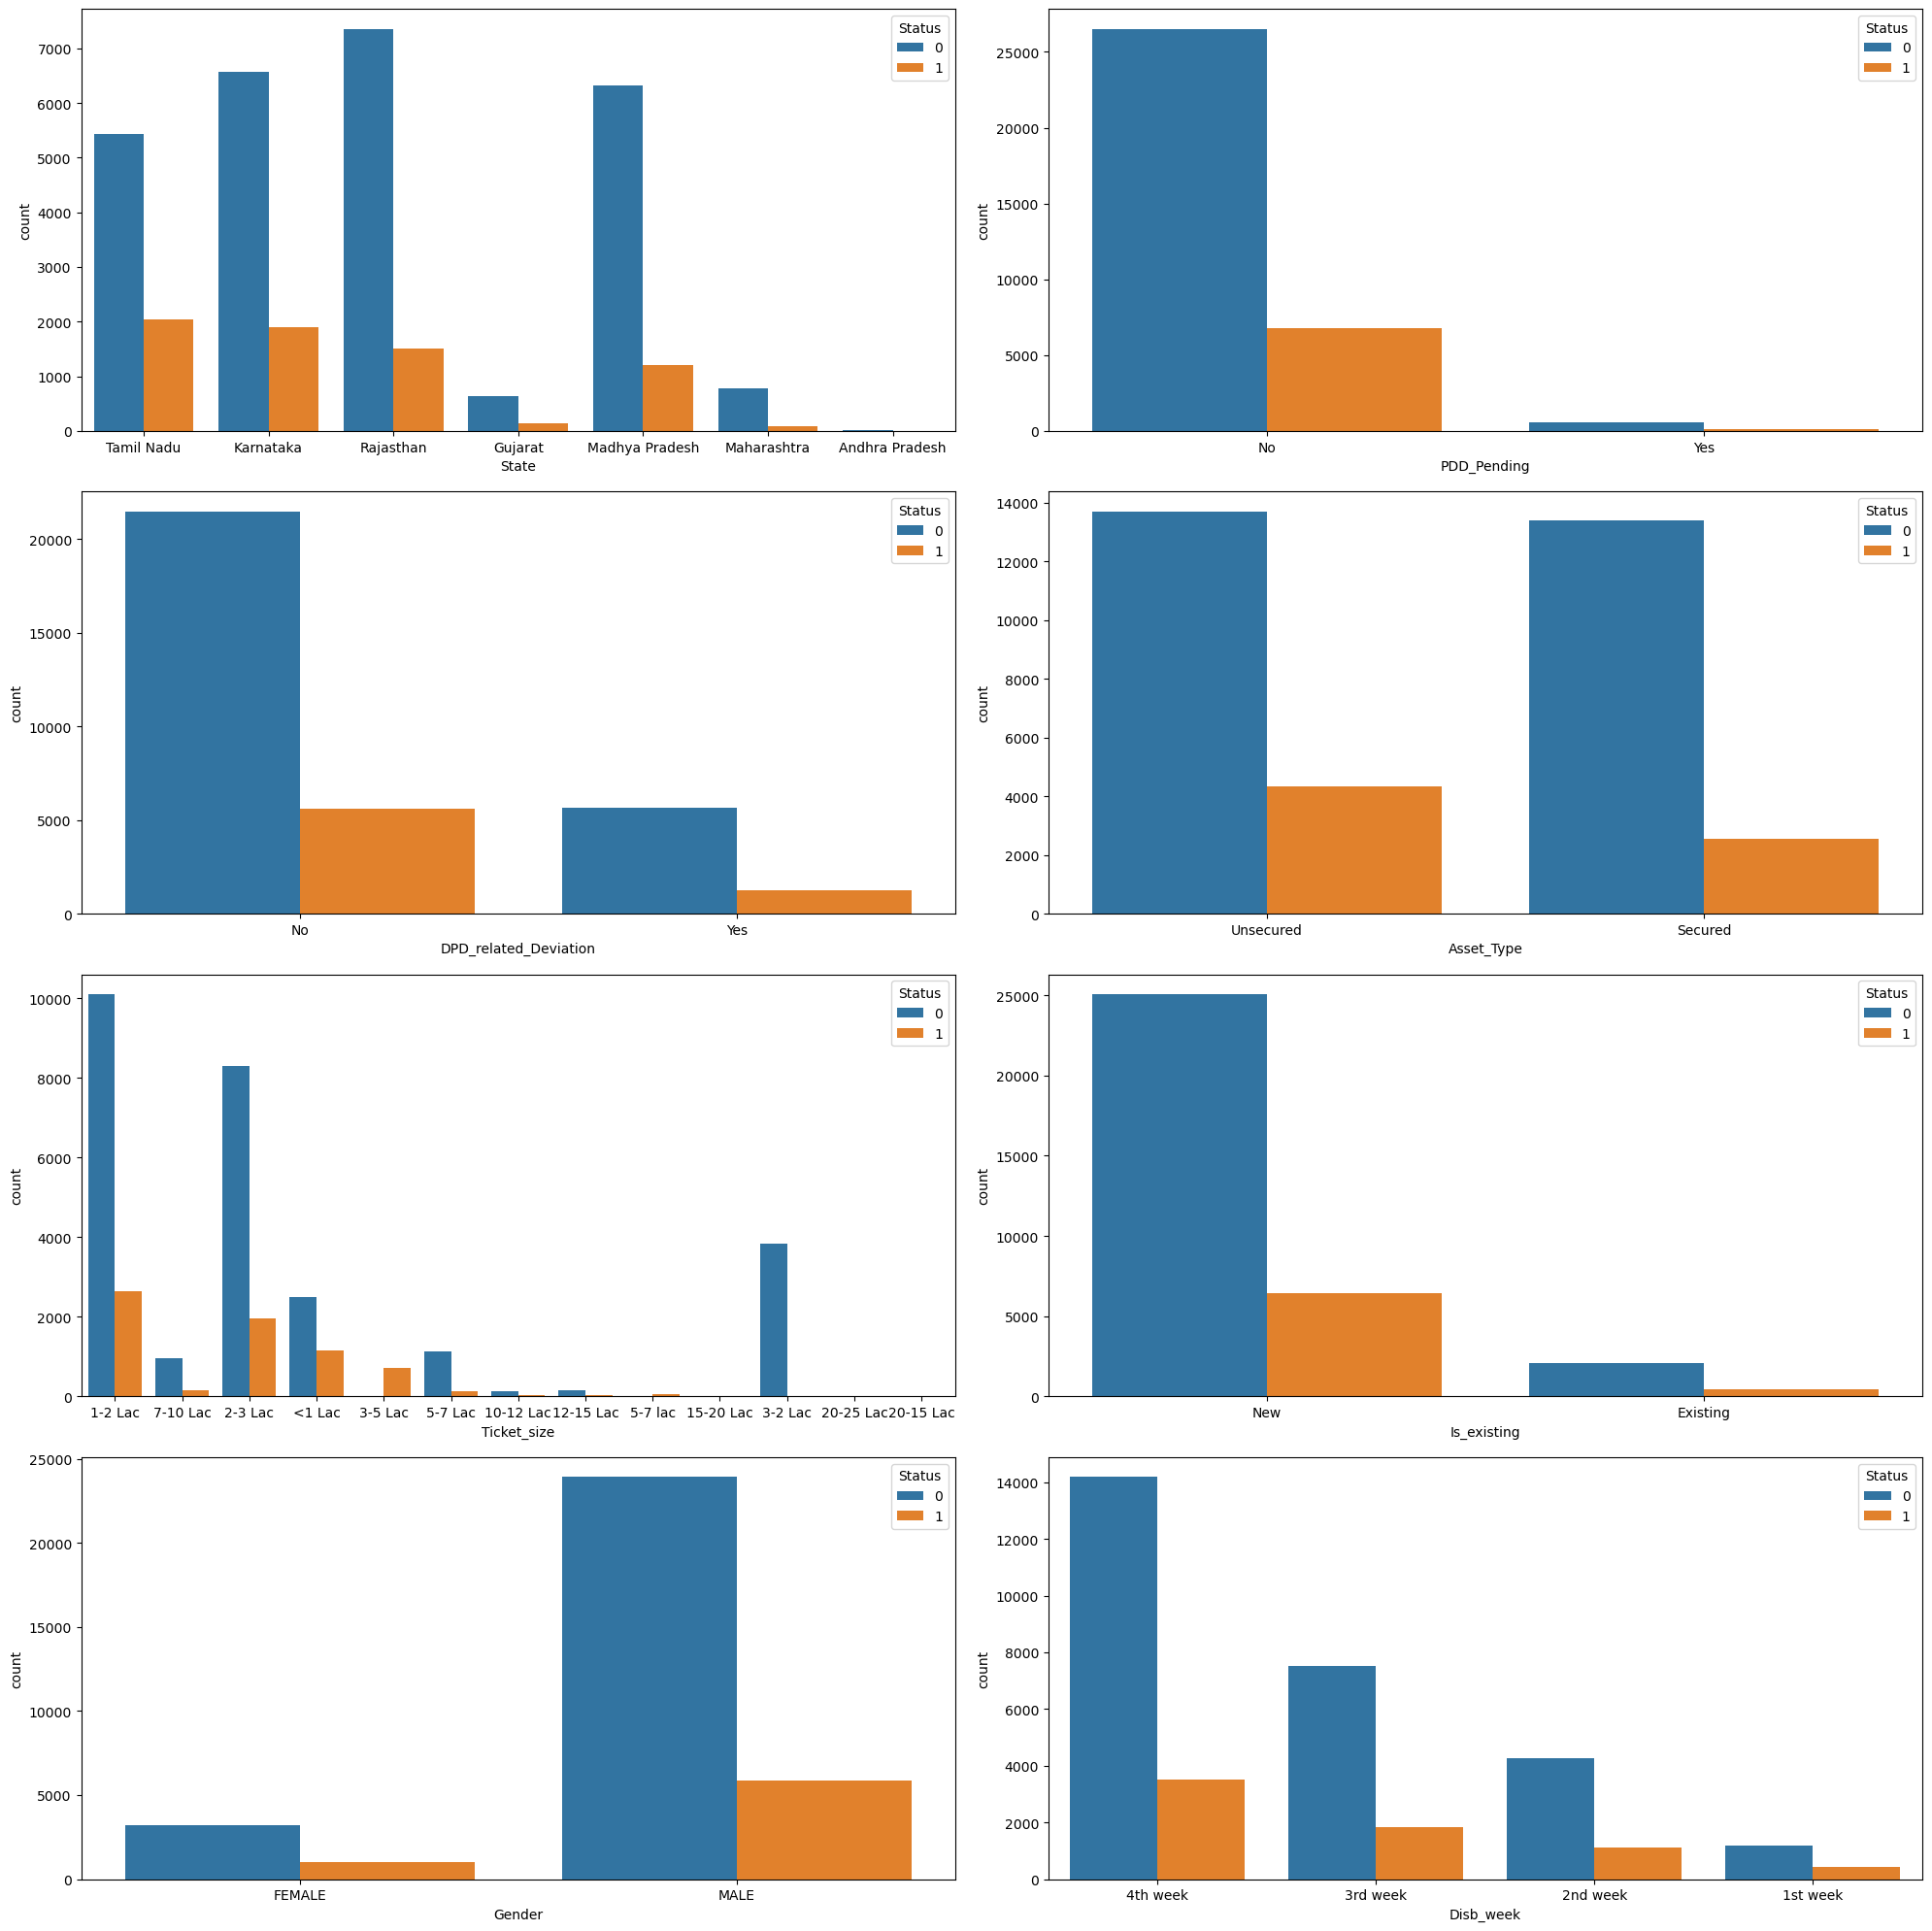

In [12]:
obj_col1=['State','PDD_Pending','DPD_related_Deviation', 'Asset_Type',  'Ticket_size','Is_existing', 'Gender',  'Disb_week']
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
axs=axs.flatten()

for i,var in enumerate(obj_col1):
    sns.countplot(data=df,x=var,hue='Status',ax=axs[i])
plt.tight_layout()
plt.show()

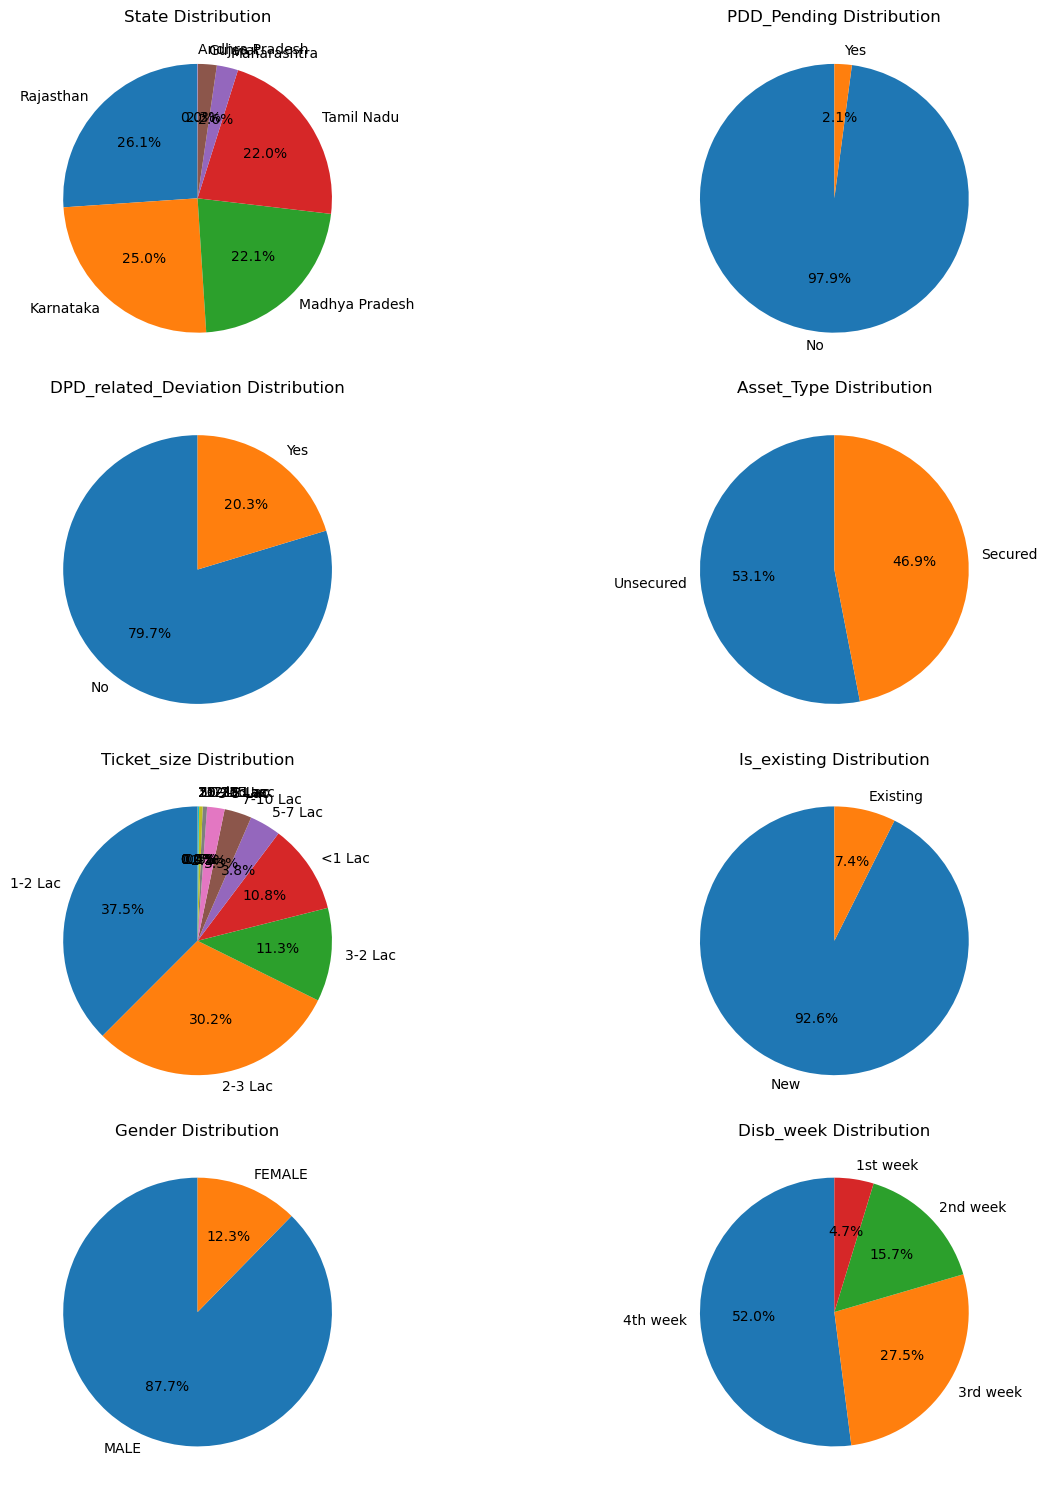

In [13]:
fig,axs=plt.subplots(nrows=4,ncols=2,figsize=(15,15))
for i,var in enumerate(obj_col1):
    if i<len(axs.flat):
        obj_count=df[var].value_counts()
        axs.flat[i].pie(obj_count,labels=obj_count.index,autopct="%1.1f%%",startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
plt.tight_layout()
plt.show()

In [14]:
num=df.select_dtypes(include=['int64','float']).columns
num

Index(['LoanAmount', 'CB_Score', 'EMI_date', 'EMI_Amount', 'Tenor',
       'Client_Vintage', 'Status'],
      dtype='object')

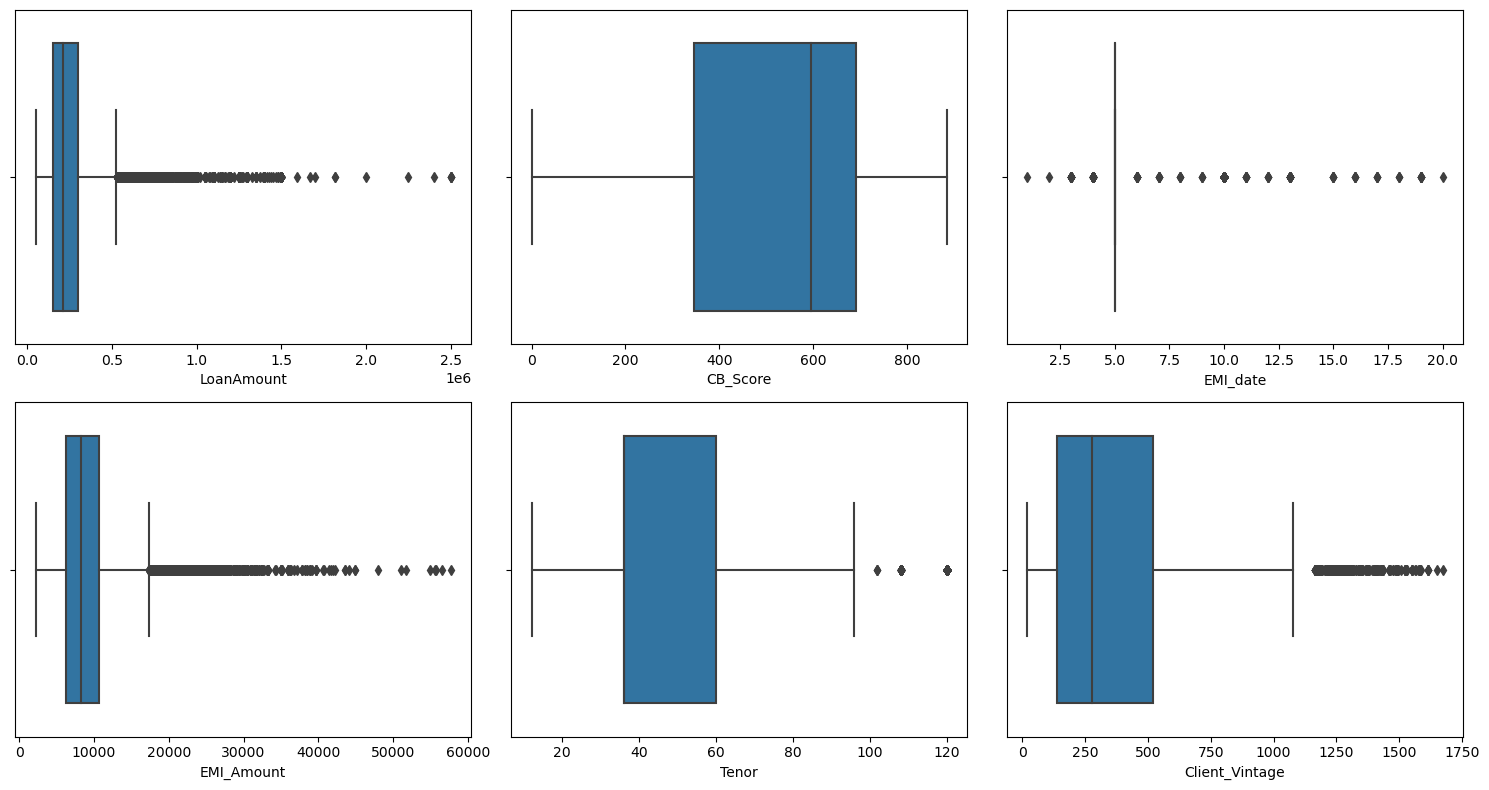

In [15]:
num1=['LoanAmount', 'CB_Score', 'EMI_date', 'EMI_Amount', 'Tenor','Client_Vintage']
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,8))
axs=axs.flatten()
for i,var in enumerate(num1):
    sns.boxplot(data=df,x=var,ax=axs[i])
plt.tight_layout()
plt.show()

In [16]:
import colorama
from colorama import Fore
from scipy.stats import chi2_contingency
import stat

State:


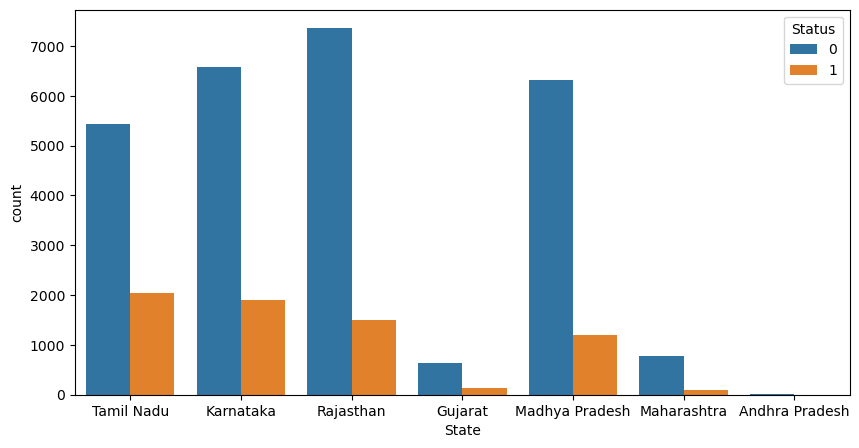

'State' is Good predictor
p_value=0.0000000000
PDD_Pending:


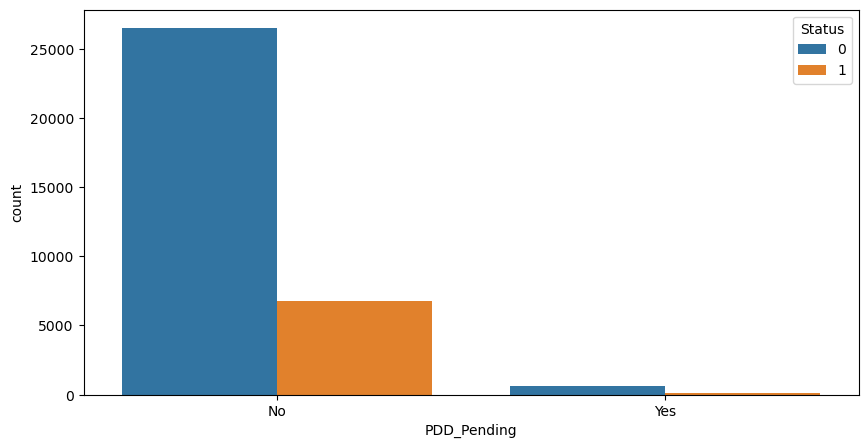

'PDD_Pending' is Good predictor
p_value=0.0094402558
DPD_related_Deviation:


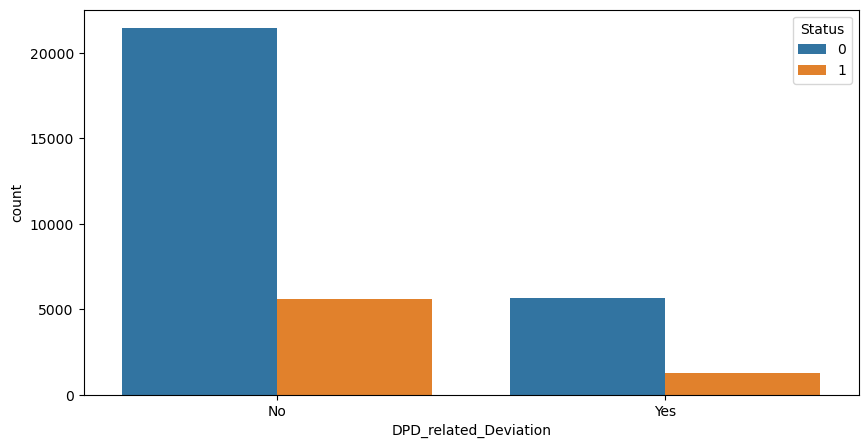

'DPD_related_Deviation' is Good predictor
p_value=0.0000043440
Asset_Type:


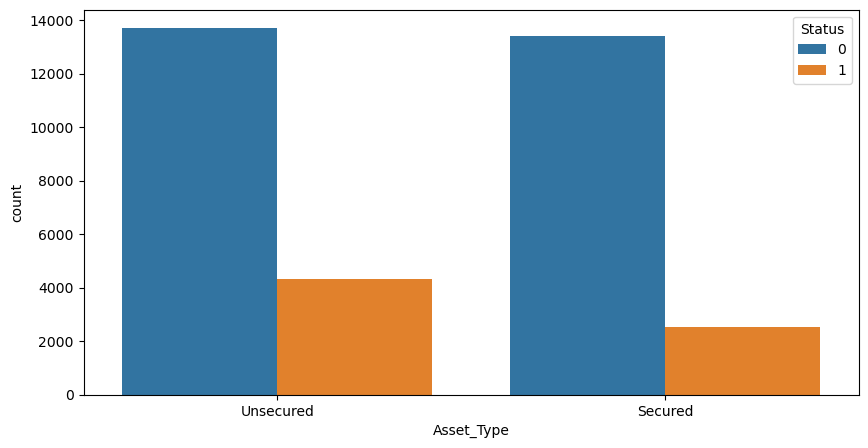

'Asset_Type' is Good predictor
p_value=0.0000000000
Ticket_size:


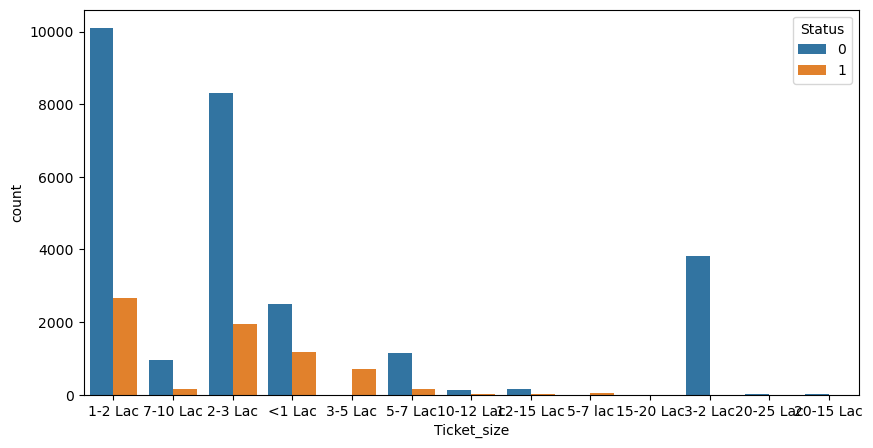

'Ticket_size' is Good predictor
p_value=0.0000000000
Is_existing:


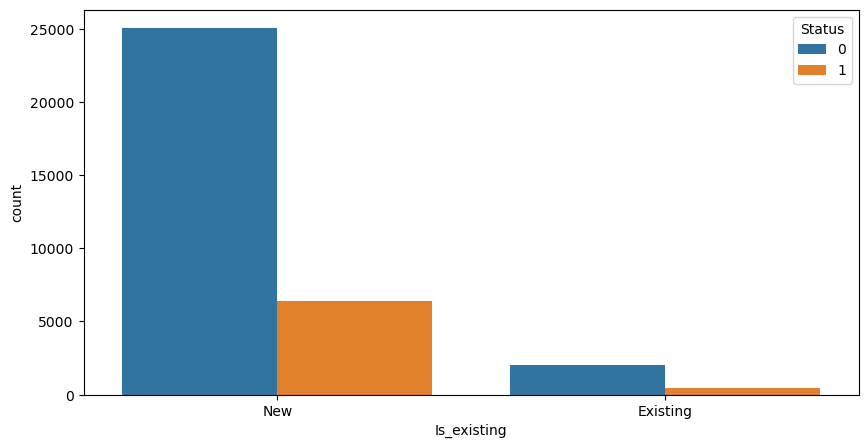

'Is_existing' is Good predictor
p_value=0.0115272819
Gender:


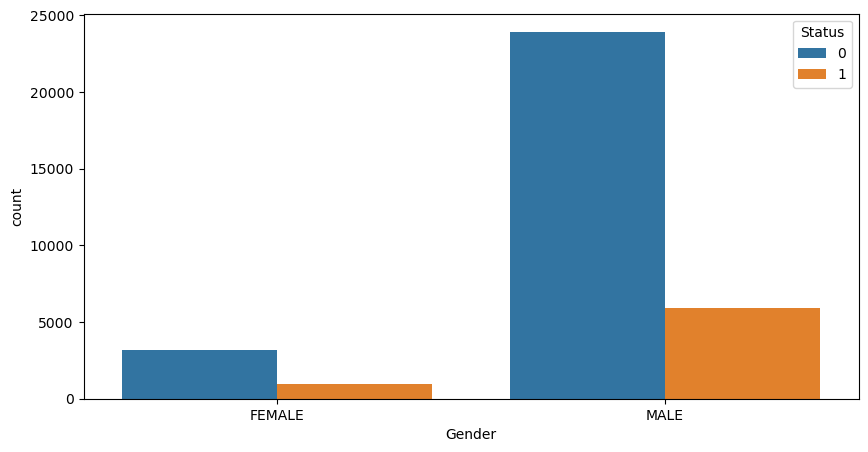

'Gender' is Good predictor
p_value=0.0000000057
Disb_week:


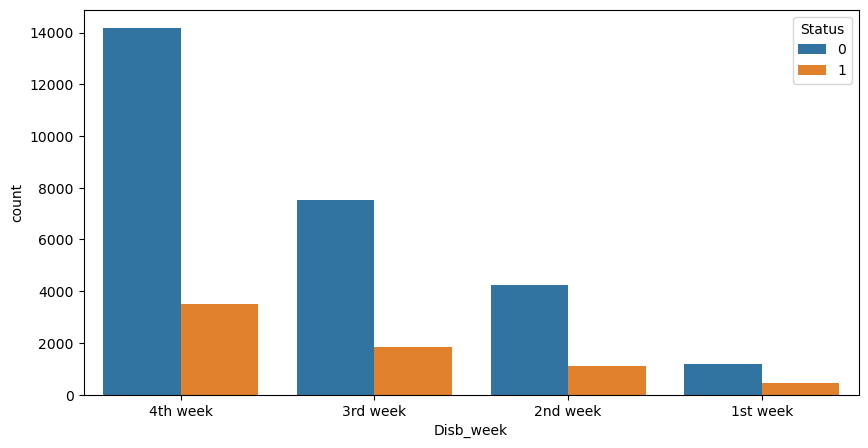

'Disb_week' is Good predictor
p_value=0.0000000005
Days_Cat:


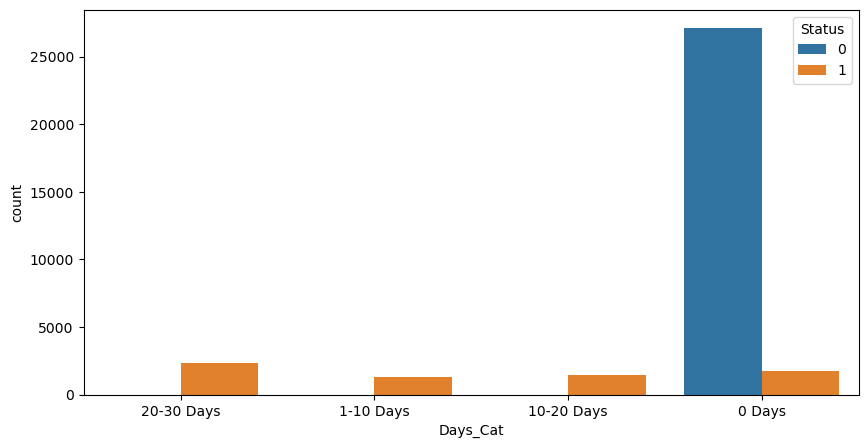

'Days_Cat' is Good predictor
p_value=0.0000000000
Payment_status:


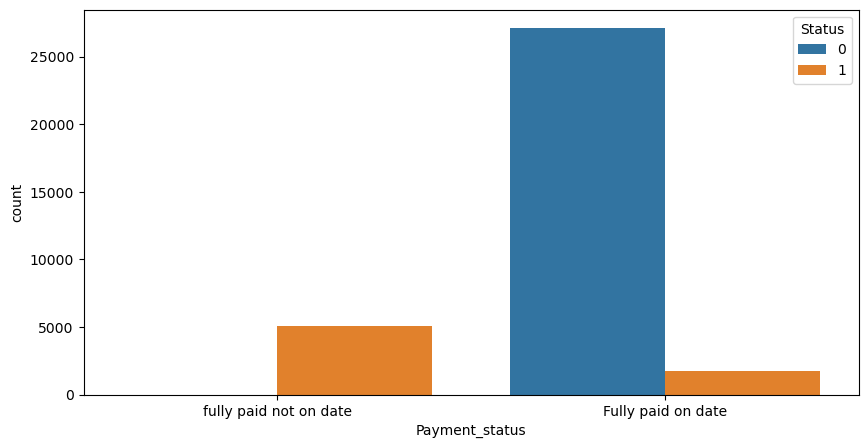

'Payment_status' is Good predictor
p_value=0.0000000000


In [17]:
obj_col1=['State','PDD_Pending','DPD_related_Deviation','Asset_Type','Ticket_size','Is_existing','Gender','Disb_week','Days_Cat','Payment_status']
for i in obj_col1:
    print(i + ":")
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=i,hue='Status')
    plt.show()
    a=np.array(pd.crosstab(df['Status'],df[i]))
    (stats,p,dof,_)=chi2_contingency(a,correction=False)
    if p > 0.05:
        print(Fore.RED +"'{}' is bad predictor".format(i))
        print("p_value={:.10f}".format(p))
    else:
        print(Fore.GREEN +"'{}' is Good predictor".format(i))
        print("p_value={:.10f}".format(p))

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf
num=df.select_dtypes(include=['int64','float']).columns
num

Index(['LoanAmount', 'CB_Score', 'EMI_date', 'EMI_Amount', 'Tenor',
       'Client_Vintage', 'Status'],
      dtype='object')

In [19]:
num1=['LoanAmount', 'CB_Score', 'EMI_date', 'EMI_Amount', 'Tenor','Client_Vintage']
for i in num1:
    print("-"*100)
    print(i +":\n")
    print('Anova:\n')
    mod=ols(i+'~Status',data=df).fit()
    aov_table=smf.stats.anova_lm(mod,type=2)
    print(aov_table,'\n')
    print('p_value={:.10f}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]
    
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both Fresh arrears OTR & fresh arrears NON-OTR and OTR not Fresh arrears\n')
        print("p_val = {:10f}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both (OTR Fresh arrears & NON-OTR fresh arrears) and OTR not Fresh arrears\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.Status,alpha=0.05)
        print(tukey,'\n')

----------------------------------------------------------------------------------------------------
LoanAmount:

Anova:

               df        sum_sq       mean_sq           F        PR(>F)
Status        1.0  9.209435e+12  9.209435e+12  222.637088  3.469257e-50
Residual  33991.0  1.406046e+15  4.136523e+10         NaN           NaN 

p_value=0.0000000000

TUKEY:

'LoanAmount' is a 'good Predictor'

Avg of this feature is not same for both (OTR Fresh arrears & NON-OTR fresh arrears) and OTR not Fresh arrears

we need to perform Tuckey as atleast one category is different

'LoanAmount' is a 'good Predictor'

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     0      1 -40968.6619   0.0 -46350.3259 -35586.9979   True
-------------------------------------------------------------- 

-----------------------------------------------------------------

In [20]:
df1=pd.get_dummies(df,columns=['Gender'])
df1

,AccountID,LoanAmount,Days_Cat,Payment_status,State,CB_Score,PDD_Pending,DPD_related_Deviation,Asset_Type,EMI_date,...,Ticket_size,EMI_Amount,Is_existing,Tenor,Client_Vintage,Non_OTR_FA,Disb_week,Status,Gender_FEMALE,Gender_MALE
0,1001SBM0360000064,120000,20-30 Days,fully paid not on date,Tamil Nadu,615.0,No,No,Unsecured,5,...,1-2 Lac,4835.0,New,36,765,Yes,4th week,1,1,0
1,10190IL0030000003,810000,1-10 Days,fully paid not on date,Tamil Nadu,429.0,No,Yes,Secured,5,...,7-10 Lac,16743.0,New,120,335,Yes,4th week,1,0,1
2,1019IL00060000006,300000,1-10 Days,fully paid not on date,Tamil Nadu,16.0,No,No,Secured,5,...,2-3 Lac,8983.0,New,60,462,Yes,4th week,1,0,1
3,1019IL00060000018,300000,20-30 Days,fully paid not on date,Tamil Nadu,379.0,No,Yes,Secured,5,...,2-3 Lac,8983.0,New,60,365,Yes,4th week,1,1,0
4,1019IL00060000028,300000,20-30 Days,fully paid not on date,Tamil Nadu,0.0,Yes,No,Secured,5,...,2-3 Lac,8806.0,New,60,309,Yes,4th week,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33988,SAMA210108000064,120000,0 Days,Fully paid on date,Rajasthan,0.0,No,No,Unsecured,5,...,1-2 Lac,4835.0,New,36,865,No,3rd week,0,1,0
33989,SAMA210108000124,250000,0 Days,Fully paid on date,Karnataka,0.0,No,No,Unsecured,5,...,2-3 Lac,9808.0,New,36,858,No,4th week,0,0,1
33990,SAMA210108000128,130000,0 Days,Fully paid on date,Karnataka,0.0,No,No,Unsecured,5,...,1-2 Lac,5169.0,New,36,860,No,3rd week,0,0,1
33991,SAMA210108000194,200000,0 Days,Fully paid on date,Karnataka,0.0,No,No,Unsecured,5,...,1-2 Lac,7847.0,New,36,859,No,3rd week,0,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
t_col=['State','PDD_Pending','DPD_related_Deviation','Asset_Type','Ticket_size','Is_existing','Disb_week','Days_Cat','Payment_status']
for col in t_col:
    print("-"*50)
    print(f'before label encoding\n{col}:{df1[col].unique()}')
    label_encod=LabelEncoder()
    label_encod.fit(df1[col].unique())
    df1[col]=label_encod.transform(df1[col])
    print(f'after label encoding\n{col}:{df1[col].unique()}')

--------------------------------------------------
before label encoding
State:['Tamil Nadu' 'Karnataka' 'Rajasthan' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Andhra Pradesh']
after label encoding
State:[6 2 5 1 3 4 0]
--------------------------------------------------
before label encoding
PDD_Pending:['No' 'Yes']
after label encoding
PDD_Pending:[0 1]
--------------------------------------------------
before label encoding
DPD_related_Deviation:['No' 'Yes']
after label encoding
DPD_related_Deviation:[0 1]
--------------------------------------------------
before label encoding
Asset_Type:['Unsecured' 'Secured']
after label encoding
Asset_Type:[1 0]
--------------------------------------------------
before label encoding
Ticket_size:['1-2 Lac' '7-10 Lac' '2-3 Lac' '<1 Lac' '3-5 Lac' '5-7 Lac' '10-12 Lac'
 '12-15 Lac' '5-7 lac' '15-20 Lac' '3-2 Lac' '20-25 Lac' '20-15 Lac']
after label encoding
Ticket_size:[ 0 11  4 12  8  9  1  2 10  3  7  6  5]
--------------------------------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_7488\689178445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(),cmap='PRGn',annot=True);


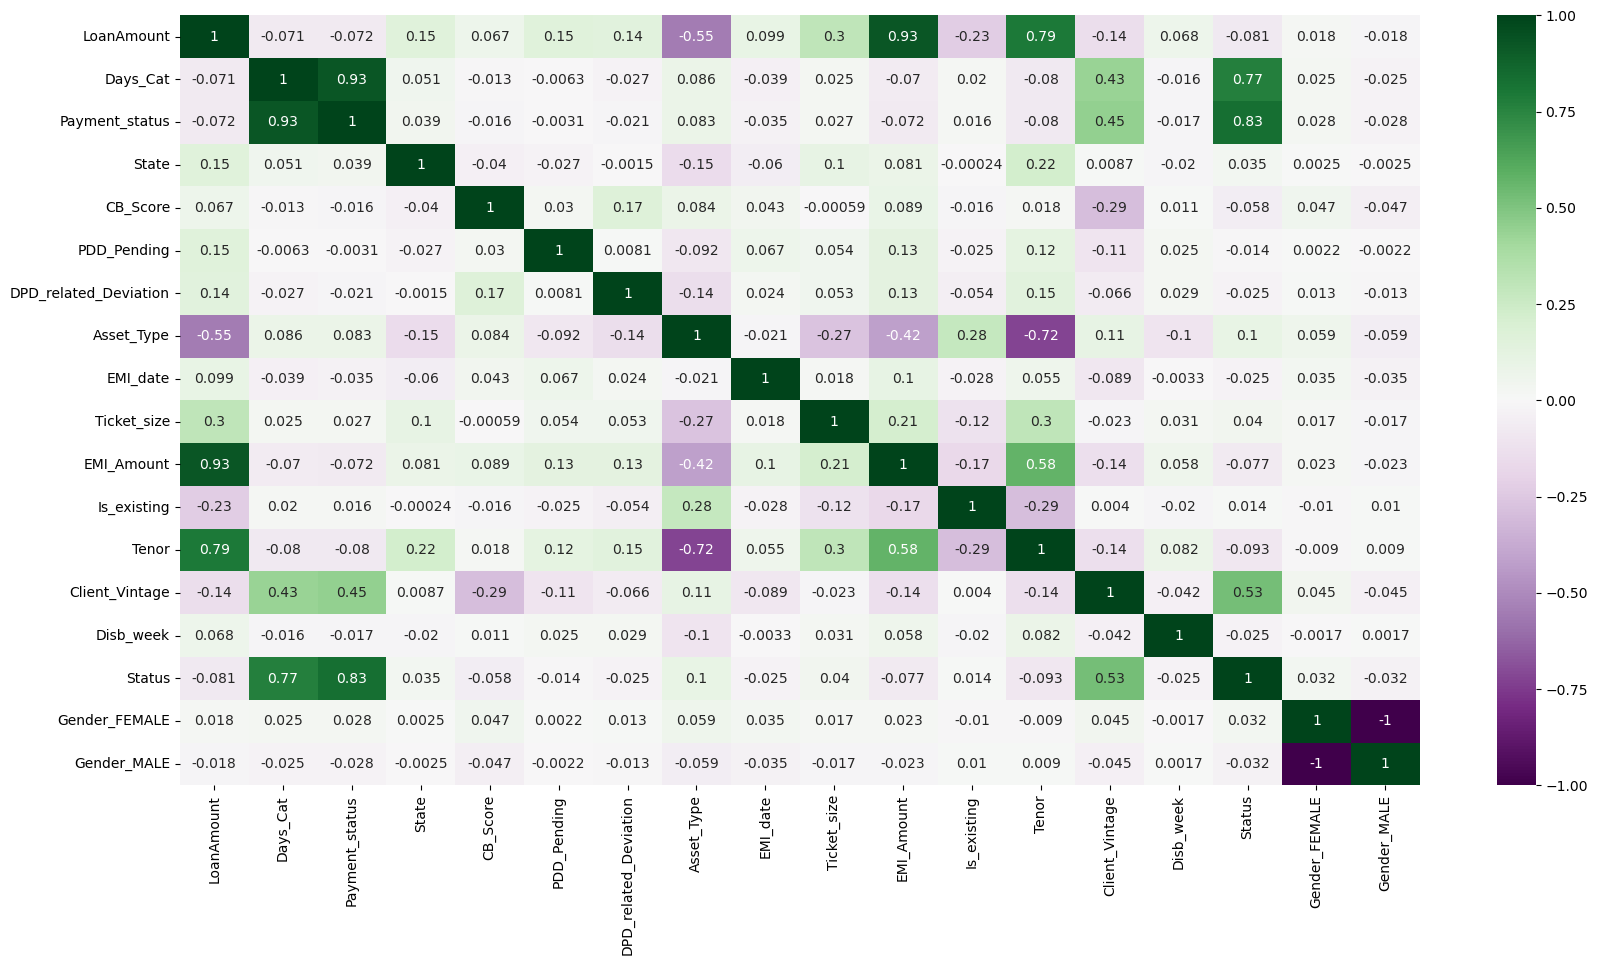

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),cmap='PRGn',annot=True);

In [24]:
x=df1.drop(['AccountID','Non_OTR_FA','Status','RM_Name','Payment_status','Days_Cat'],axis=1)
y=df1['Status']
y.shape
x.shape

(33993, 15)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [27]:
dtree=DecisionTreeClassifier(random_state=42)
parm={'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],  # You can set a range of values to explore
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
n_iter_search = 10

random_search = RandomizedSearchCV(
    dtree, param_distributions=parm, n_iter=n_iter_search, cv=5, random_state=42
)

random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [28]:
print("Best Hyperparameters found:")
print(random_search.best_params_)
print("Best Score found:")
print(random_search.best_score_)

Best Hyperparameters found:
{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 40, 'criterion': 'gini'}
Best Score found:
0.8727661047421463


In [29]:
d_tree=DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=10,criterion='gini',splitter='best',max_features='sqrt')
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [30]:
y_prd=d_tree.predict(x_test)
print(f'Model accuracy score :{round(accuracy_score(y_test,y_prd)*100,2)}',"%")

Model accuracy score :85.5 %


In [31]:
from sklearn.metrics import f1_score,precision_score,recall_score,log_loss
print(f'fl_score :',round((f1_score(y_test,y_prd,average='micro')),2))
print(f'Precision_score :',round((precision_score(y_test,y_prd,average='micro')),2))
print(f'Recall_score :',round((recall_score(y_test,y_prd,average='micro')),2))
print(f'Log_loss :',round((log_loss(y_test,y_prd)),2))

fl_score : 0.85
Precision_score : 0.85
Recall_score : 0.85
Log_loss : 5.23


In [32]:
im_ft=pd.DataFrame({"Feature_names":x_train.columns,"Features_importance":d_tree.feature_importances_})
fe=im_ft.sort_values(by='Features_importance',ascending=False)

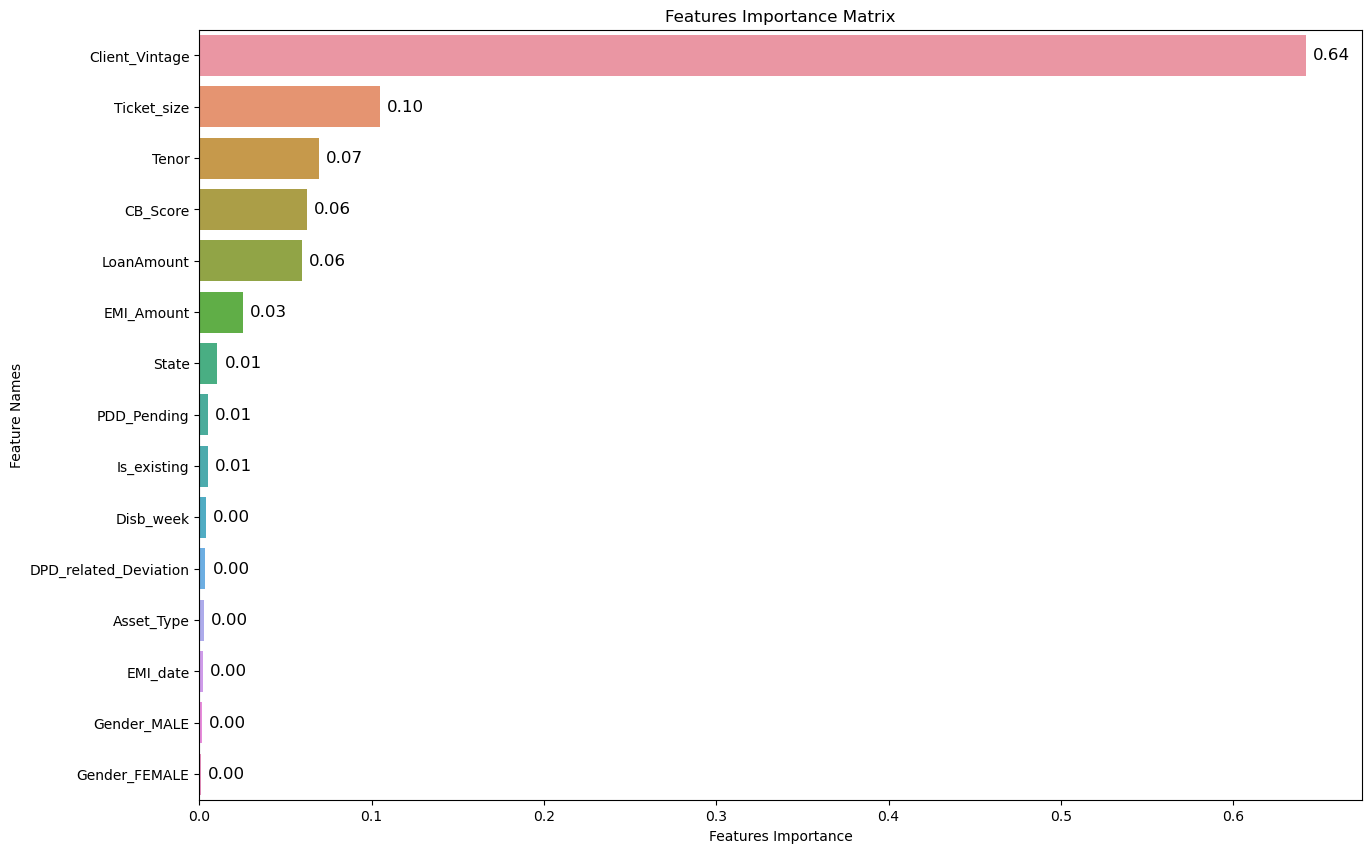

In [33]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=fe, x="Features_importance", y="Feature_names")

# Add data labels to the bar chart
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),  # offset text position slightly to the right
                textcoords="offset points",
                ha='left', va='center', fontsize=12, color='black')

plt.title('Features Importance Matrix')
plt.xlabel('Features Importance')
plt.ylabel('Feature Names')
plt.show()

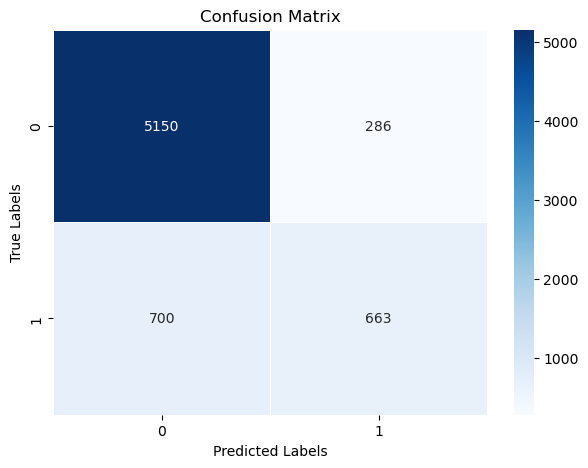

In [34]:
cm=confusion_matrix(y_test,y_prd)
plt.figure(figsize=(7,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5,fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show();

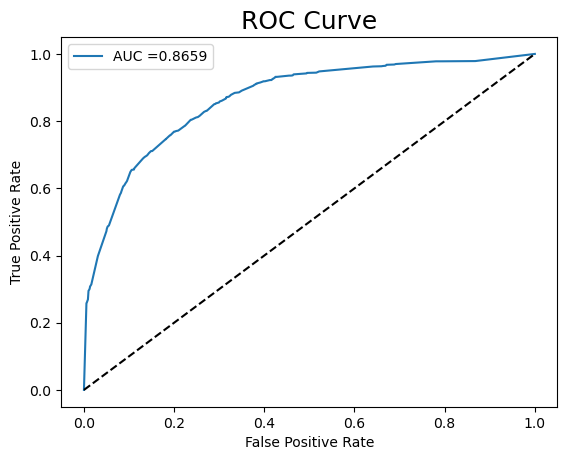

In [35]:
y_pred_prob=d_tree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)


df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])


plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle="--",color="k")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve",fontsize=18)
plt.legend();

In [36]:
import shap

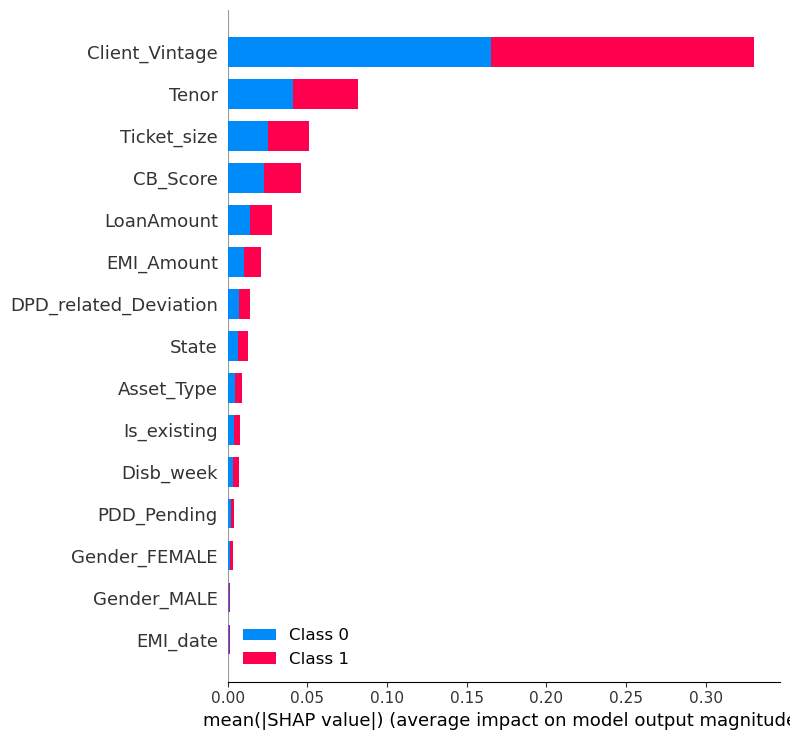

In [38]:
explainer=shap.TreeExplainer(d_tree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


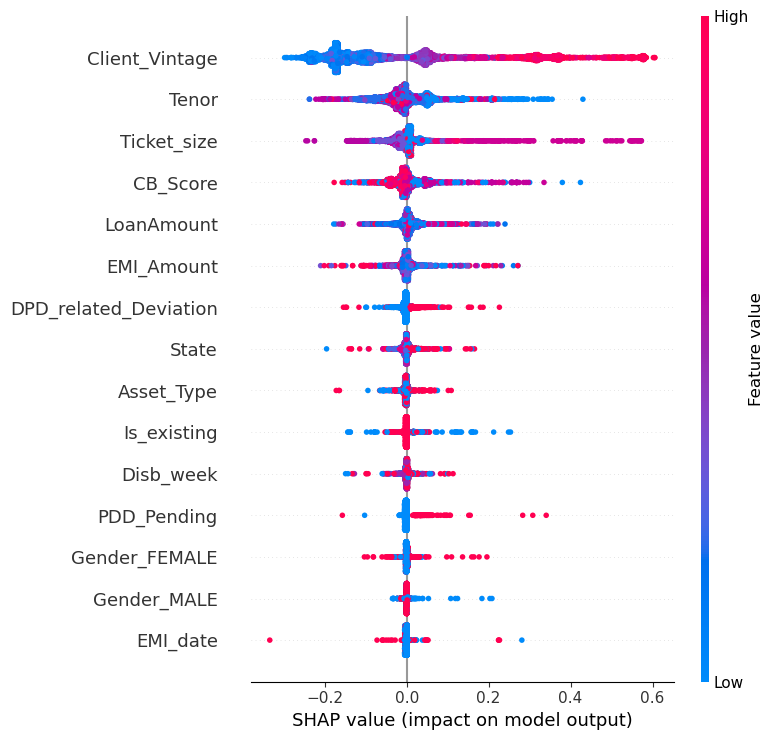

In [39]:
explainer=shap.TreeExplainer(d_tree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values[1],x_test.values,feature_names=x_test.columns)

In [69]:
new_df=pd.read_excel(r"D:\My projects\Customer default prediction\MLprojects\New_Data.xlsx")

In [70]:
new_df.isnull().sum()

AccountID                   0
LoanAmount                  0
Days_Cat                    0
Payment_status              0
State                       0
CB_Score                 2349
PDD_Pending                 0
DPD_related_Deviation       0
Asset_Type                  0
EMI_date                    0
RM_Name                    29
Ticket_size                 0
EMI_Amount                  0
Is_existing                 0
Gender                    178
Tenor                       0
Client_Vintage              0
Non_OTR_FA                  0
Disb_week                   0
Status                      0
dtype: int64

In [71]:
new_df['CB_Score'].fillna(new_df['CB_Score'].mean(),inplace=True)
new_df['Gender'].fillna(new_df['Gender'].value_counts().idxmax(),inplace=True)
new_df['RM_Name'].fillna(new_df['RM_Name'].value_counts().idxmax(),inplace=True)

In [72]:
new_df.isnull().sum()

AccountID                0
LoanAmount               0
Days_Cat                 0
Payment_status           0
State                    0
CB_Score                 0
PDD_Pending              0
DPD_related_Deviation    0
Asset_Type               0
EMI_date                 0
RM_Name                  0
Ticket_size              0
EMI_Amount               0
Is_existing              0
Gender                   0
Tenor                    0
Client_Vintage           0
Non_OTR_FA               0
Disb_week                0
Status                   0
dtype: int64

In [73]:
obj=new_df.select_dtypes(include="object").columns
obj

Index(['AccountID', 'Days_Cat', 'Payment_status', 'State', 'PDD_Pending',
       'DPD_related_Deviation', 'Asset_Type', 'RM_Name', 'Ticket_size',
       'Is_existing', 'Gender', 'Non_OTR_FA', 'Disb_week'],
      dtype='object')

In [74]:
new_df1=pd.get_dummies(new_df,columns=['Gender'])

In [75]:
obj1=['State', 'PDD_Pending','DPD_related_Deviation', 'Asset_Type','Ticket_size','Is_existing', 'Disb_week']
for col in obj1:
    print("-"*50)
    print(f"Before label encoding:{col}:{new_df1[col].unique()}")
    label_enc=LabelEncoder()
    label_enc.fit(new_df1[col].unique())
    new_df1[col]=label_enc.transform(new_df1[col])
    print(f"After label encoding:{col}:{new_df1[col].unique()}")

--------------------------------------------------
Before label encoding:State:['Tamil Nadu' 'Andhra Pradesh' 'Karnataka' 'Rajasthan' 'Gujarat'
 'Madhya Pradesh' 'Maharashtra']
After label encoding:State:[6 0 2 5 1 3 4]
--------------------------------------------------
Before label encoding:PDD_Pending:['No' 'Yes']
After label encoding:PDD_Pending:[0 1]
--------------------------------------------------
Before label encoding:DPD_related_Deviation:['No' 'Yes']
After label encoding:DPD_related_Deviation:[0 1]
--------------------------------------------------
Before label encoding:Asset_Type:['Secured' 'Unsecured']
After label encoding:Asset_Type:[0 1]
--------------------------------------------------
Before label encoding:Ticket_size:['3-2 Lac' '5-7 Lac' '7-10 Lac' '2-3 Lac' '1-2 Lac' '<1 Lac' '12-15 Lac'
 '10-12 Lac' '20-25 Lac' '20-15 Lac']
After label encoding:Ticket_size:[6 7 8 3 0 9 2 1 5 4]
--------------------------------------------------
Before label encoding:Is_existing:['Ne

In [77]:
new_df1.columns.tolist()

['AccountID',
 'LoanAmount',
 'Days_Cat',
 'Payment_status',
 'State',
 'CB_Score',
 'PDD_Pending',
 'DPD_related_Deviation',
 'Asset_Type',
 'EMI_date',
 'RM_Name',
 'Ticket_size',
 'EMI_Amount',
 'Is_existing',
 'Tenor',
 'Client_Vintage',
 'Non_OTR_FA',
 'Disb_week',
 'Status',
 'Gender_FEMALE',
 'Gender_MALE']

In [81]:
new_prd=d_tree.predict(x1)

In [83]:
new_df['predicted']=new_prd

In [85]:
new_df['predicted'].value_counts()

0    25264
1     1850
Name: predicted, dtype: int64

In [86]:
y_pred_prob1=d_tree.predict_proba(x1)[:][:,1]

In [88]:
new_df['Probablity']=y_pred_prob1

In [90]:
new_df.to_excel(r"D:\My projects\Customer default prediction\MLprojects\New_Data_pred.xlsx")